# 載入模組

In [52]:
# Basic packages always been used
import math
import pandas as pd
import numpy as np
import matplotlib.dates as mdates 
import matplotlib.pyplot as plt
import yfinance as yf

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

# 載入數據

In [108]:
df = yf.Ticker("TSM").history(period="5y")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-06-11 00:00:00-04:00,33.545117,33.674138,33.338684,33.338684,4511600,0.0,0.0
2018-06-12 00:00:00-04:00,33.656935,33.854765,33.527914,33.717144,6582600,0.0,0.0
2018-06-13 00:00:00-04:00,34.173013,34.310634,33.588123,33.588123,9616600,0.0,0.0
2018-06-14 00:00:00-04:00,33.570918,33.605324,33.201061,33.201061,7636000,0.0,0.0
2018-06-15 00:00:00-04:00,33.390295,33.493510,33.158059,33.278477,11235700,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-05 00:00:00-04:00,98.010002,98.809998,94.250000,98.050003,10568500,0.0,0.0
2023-06-06 00:00:00-04:00,97.610001,100.599998,97.419998,99.820000,13827600,0.0,0.0
2023-06-07 00:00:00-04:00,101.379997,103.019997,99.540001,100.290001,14367500,0.0,0.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-06-11 00:00:00-04:00 to 2023-06-09 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1259 non-null   float64
 1   High          1259 non-null   float64
 2   Low           1259 non-null   float64
 3   Close         1259 non-null   float64
 4   Volume        1259 non-null   int64  
 5   Dividends     1259 non-null   float64
 6   Stock Splits  1259 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.7 KB


In [55]:
df = df.filter(['Close'])
df

,Close
Date,
2018-06-11 00:00:00-04:00,33.338684
2018-06-12 00:00:00-04:00,33.717140
2018-06-13 00:00:00-04:00,33.588116
2018-06-14 00:00:00-04:00,33.201057
2018-06-15 00:00:00-04:00,33.278481
...,...
2023-06-05 00:00:00-04:00,98.050003
2023-06-06 00:00:00-04:00,99.820000
2023-06-07 00:00:00-04:00,100.290001


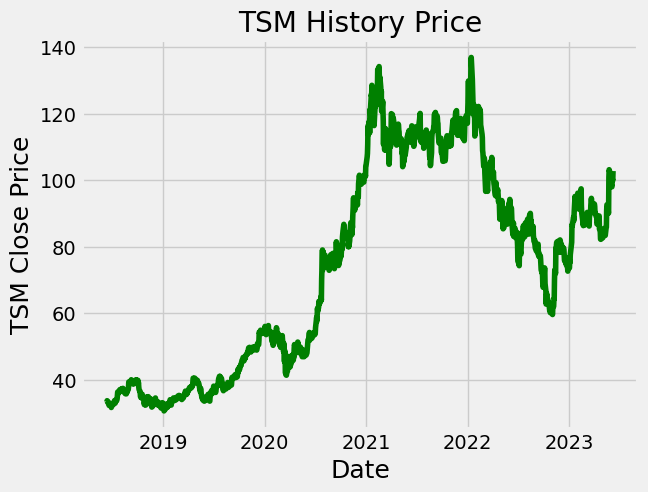

In [56]:
plt.style.use('fivethirtyeight')
plt.plot(df['Close'], color='green')
plt.ylabel('TSM Close Price', fontsize=18)
plt.title('TSM History Price')
plt.xlabel('Date', fontsize=18)

plt.show()

In [57]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df.values)
scaled_data

array([[0.02542479],
       [0.02898372],
       [0.0277704 ],
       ...,
       [0.65502277],
       [0.65173144],
       [0.67862637]])

# 構建數據集

In [58]:
Forecast_days = 120

x_all,y_all = [], []
for i in range(len(scaled_data) - Forecast_days):
    x = scaled_data[i:i + Forecast_days]
    y = scaled_data[i + Forecast_days]
    x_all.append(x)
    y_all.append(y)
    
x_all, y_all = np.array(x_all), np.array(y_all)   

In [59]:
x_all.shape, y_all.shape

((1139, 120, 1), (1139, 1))

# 切割數據集

In [68]:
DS_split = 0.8

DS_train = round(x_all.shape[0] * DS_split)
x_train, y_train = x_all[:DS_train], y_all[:DS_train]
x_test, y_test = x_all[DS_train:], y_all[DS_train:]

In [69]:
x_train.shape, y_train.shape

((911, 120, 1), (911, 1))

In [70]:
x_test.shape, y_test.shape

((228, 120, 1), (228, 1))

# 構建訓練模型

In [71]:
model = Sequential()
model.add(LSTM(100, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences = False))
model.add(Dense(50))
model.add(Dense(1))
opt=Adam(learning_rate=0.002,beta_1=0.95)
model.compile(optimizer=opt, loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 120, 100)          40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 126,301
Trainable params: 126,301
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [72]:
early_stopping = EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)
history = model.fit(x_train, y_train, epochs = 1000, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/1000
23/23 [==============================] - 5s 131ms/step - loss: 0.0336 - val_loss: 0.0168
Epoch 2/1000
23/23 [==============================] - 3s 114ms/step - loss: 0.0040 - val_loss: 0.0019
Epoch 3/1000
23/23 [==============================] - 3s 113ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 4/1000
23/23 [==============================] - 3s 113ms/step - loss: 9.0980e-04 - val_loss: 0.0015
Epoch 5/1000
23/23 [==============================] - 3s 112ms/step - loss: 7.1295e-04 - val_loss: 0.0016
Epoch 6/1000
23/23 [==============================] - 3s 112ms/step - loss: 7.5402e-04 - val_loss: 0.0016
Epoch 7/1000
23/23 [==============================] - 3s 112ms/step - loss: 6.8730e-04 - val_loss: 0.0020
Epoch 8/1000
23/23 [==============================] - 3s 112ms/step - loss: 8.2571e-04 - val_loss: 0.0015
Epoch 9/1000
23/23 [==============================] - 3s 113ms/step - loss: 6.8882e-04 - val_loss: 0.0015
Epoch 10/1000
23/23 [==============================] - 3s 

In [73]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'val_loss'])

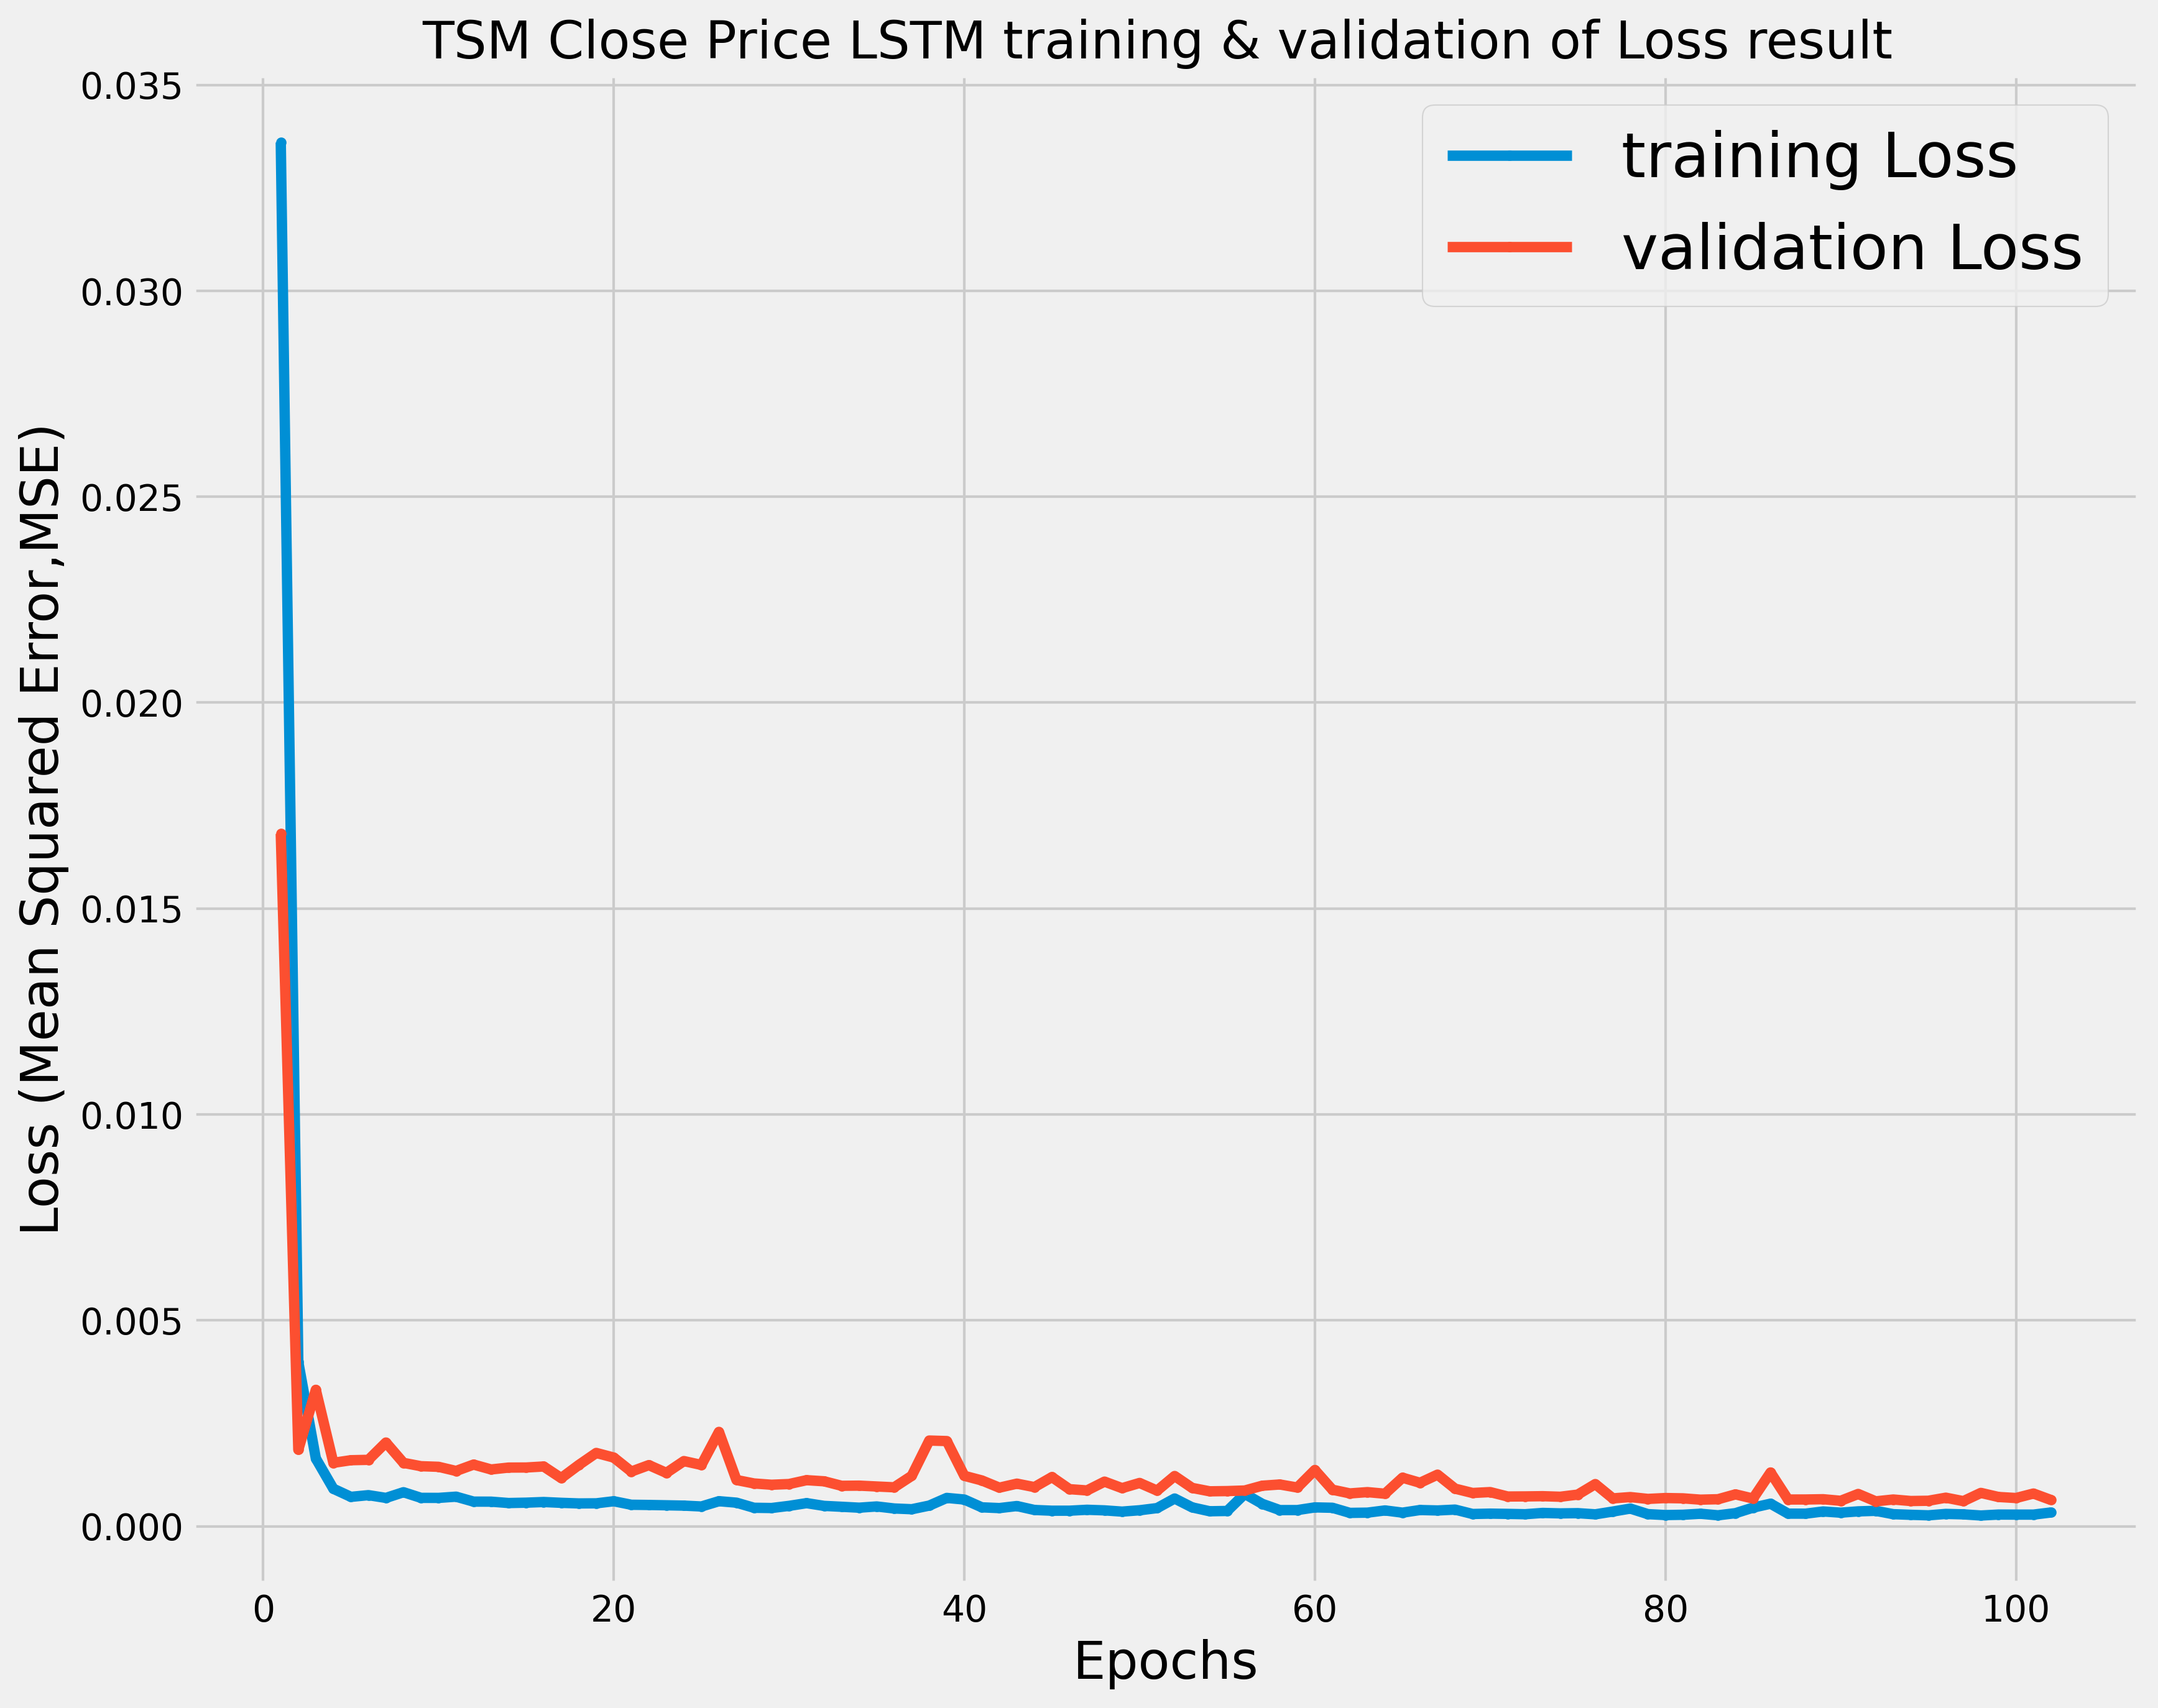

In [74]:
#Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('TSM Close Price LSTM training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

# 評估模型

In [75]:
prediction= model.predict(x_test)
prediction

8/8 [==============================] - 1s 36ms/step


array([[0.478641  ],
       [0.49909955],
       [0.49360728],
       [0.50324005],
       [0.51061684],
       [0.52039135],
       [0.5148063 ],
       [0.5106576 ],
       [0.4977646 ],
       [0.51232153],
       [0.52743894],
       [0.53225994],
       [0.5188305 ],
       [0.50997394],
       [0.5102824 ],
       [0.5237768 ],
       [0.53890496],
       [0.53281367],
       [0.5106962 ],
       [0.52236736],
       [0.5361209 ],
       [0.5499057 ],
       [0.55887735],
       [0.5505171 ],
       [0.540378  ],
       [0.5370199 ],
       [0.52398425],
       [0.50666726],
       [0.50562257],
       [0.5049909 ],
       [0.5178481 ],
       [0.5066531 ],
       [0.48797008],
       [0.47984076],
       [0.48187253],
       [0.47390035],
       [0.4654939 ],
       [0.45719206],
       [0.45381895],
       [0.45513493],
       [0.46412936],
       [0.47219566],
       [0.45467466],
       [0.44951257],
       [0.44162217],
       [0.43800157],
       [0.43949556],
       [0.440

In [76]:
prediction = scaler.inverse_transform(prediction)
prediction

array([[ 81.53361 ],
       [ 83.70916 ],
       [ 83.125114],
       [ 84.14946 ],
       [ 84.93391 ],
       [ 85.97332 ],
       [ 85.37941 ],
       [ 84.93824 ],
       [ 83.5672  ],
       [ 85.11518 ],
       [ 86.72276 ],
       [ 87.23543 ],
       [ 85.80734 ],
       [ 84.86554 ],
       [ 84.89834 ],
       [ 86.333336],
       [ 87.942055],
       [ 87.29431 ],
       [ 84.942345],
       [ 86.18345 ],
       [ 87.646   ],
       [ 89.11188 ],
       [ 90.06592 ],
       [ 89.17689 ],
       [ 88.0987  ],
       [ 87.7416  ],
       [ 86.35539 ],
       [ 84.51391 ],
       [ 84.40282 ],
       [ 84.33564 ],
       [ 85.70287 ],
       [ 84.5124  ],
       [ 82.52566 ],
       [ 81.66119 ],
       [ 81.87724 ],
       [ 81.02949 ],
       [ 80.135544],
       [ 79.25272 ],
       [ 78.894035],
       [ 79.03397 ],
       [ 79.99044 ],
       [ 80.848206],
       [ 78.98502 ],
       [ 78.4361  ],
       [ 77.59703 ],
       [ 77.21201 ],
       [ 77.37088 ],
       [ 77.4

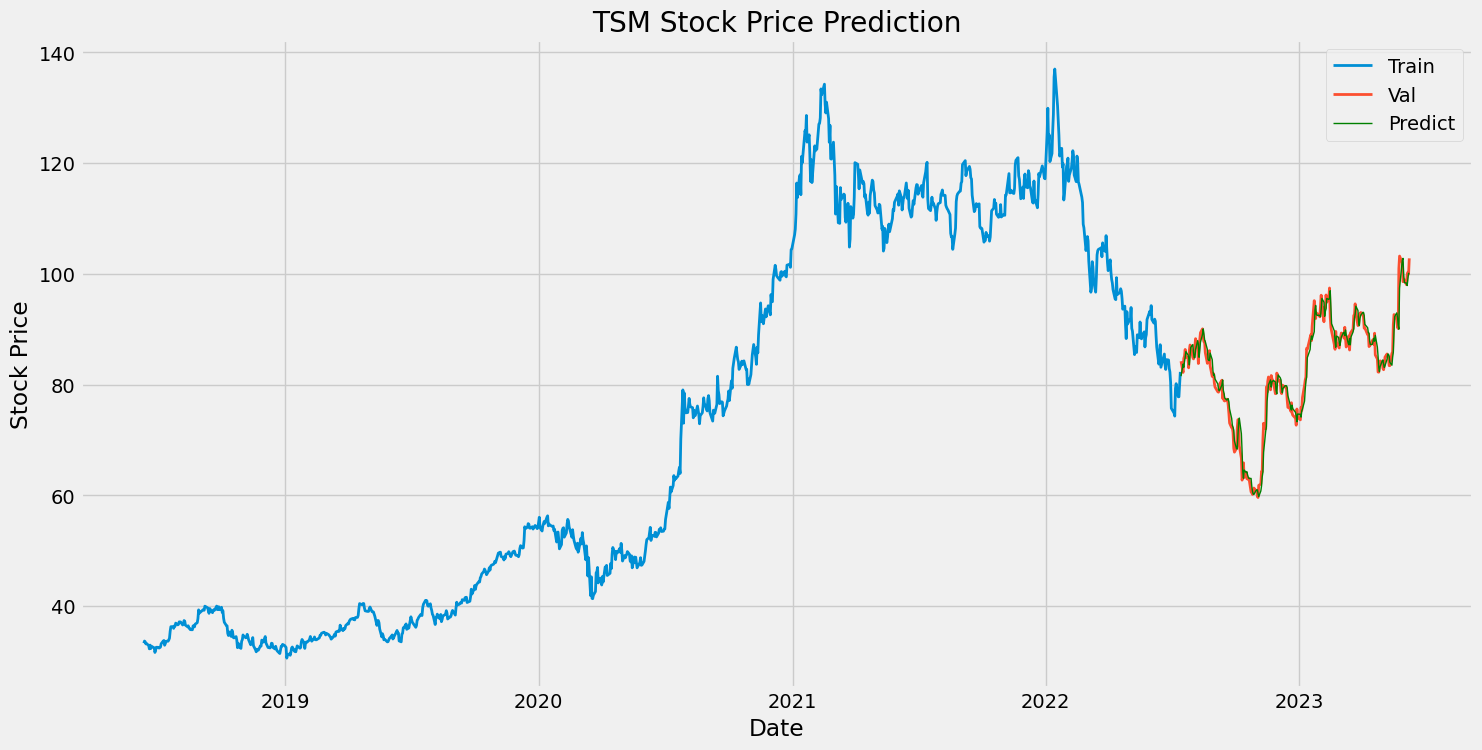

In [109]:
train_df = df[:DS_train + Forecast_days]
test_df = df[DS_train + Forecast_days:]
test_df = test_df.assign(Predict = prediction)

plt.figure(figsize=(16,8))
plt.plot(train_df['Close'], linewidth = 2)
plt.plot(test_df['Close'], linewidth = 2)
plt.plot(test_df['Predict'], color='green', linewidth = 1)
plt.title('TSM Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(['Train', 'Val', 'Predict'])
plt.show()

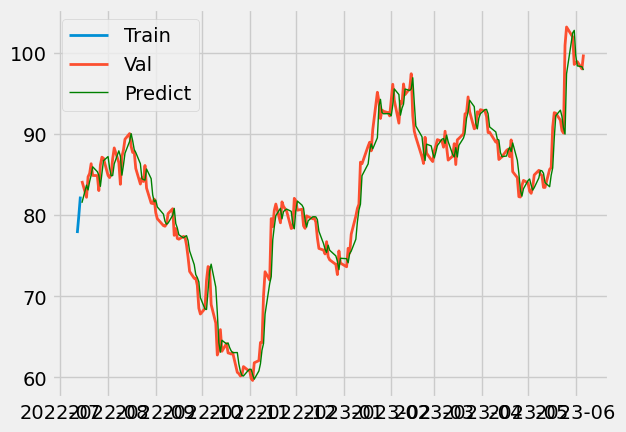

In [115]:
plt.plot(train_df['Close'][-3:], linewidth=2)
plt.plot(test_df['Close'][:-3], linewidth = 2)
plt.plot(test_df['Predict'][:-3], color='green', linewidth = 1)
plt.legend(['Train', 'Val', 'Predict'])
plt.show()

In [100]:
test_df = test_df.assign(Predict = prediction)
test_df

,Close,Predict
Date,,
2022-07-15 00:00:00-04:00,84.230042,81.533607
2022-07-18 00:00:00-04:00,82.213562,83.709160
2022-07-19 00:00:00-04:00,84.741547,83.125114
2022-07-20 00:00:00-04:00,85.144844,84.149460
2022-07-21 00:00:00-04:00,86.354729,84.933907
...,...,...
2023-06-05 00:00:00-04:00,98.050003,98.321579
2023-06-06 00:00:00-04:00,99.820000,97.894157
2023-06-07 00:00:00-04:00,100.290001,99.120911


In [107]:
rsme = mean_squared_error(test_df['Close'], test_df['Predict'], squared = False)
crmse = rsme / test_df['Close'].mean() * 100
rsme,crmse

(2.103986851616184, 2.5401386003382562)